In [28]:
import numpy as np
import pandas as pd
import sklearn.datasets as dt
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer,make_classification,make_blobs,make_circles,load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import  mean_squared_error
from sklearn.utils import resample
from graphviz import Digraph, nohtml
import io
from scipy import stats
from sklearn.utils import shuffle
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from sklearn.neural_network import MLPClassifier
!pip install scipy
from matplotlib.patches import Polygon
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D
from mlxtend.plotting import plot_decision_regions
from scipy.stats import skew
from typing_extensions import final
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import scipy.io
from graphviz import Digraph, nohtml

In [29]:
import pandas as pd
from sklearn.datasets import load_iris

# بارگذاری دیتاست
iris = load_iris()
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# نمایش چند سطر اول دیتاست
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [30]:
import pandas as pd
from sklearn.datasets import load_iris

# بارگذاری دیتاست
iris = load_iris()
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)

# محاسبه میانگین ویژگی‌ها
mean_values = iris_df.mean()
print("میانگین ویژگی‌ها:\n", mean_values)

# محاسبه واریانس ویژگی‌ها
variance_values = iris_df.var()
print("واریانس ویژگی‌ها:\n", variance_values)

# محاسبه همبستگی ویژگی‌ها
correlation_matrix = iris_df.corr()
print("همبستگی ویژگی‌ها:\n", correlation_matrix)

میانگین ویژگی‌ها:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
واریانس ویژگی‌ها:
 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64
همبستگی ویژگی‌ها:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


**ترسیم نمونه های دیتاست**

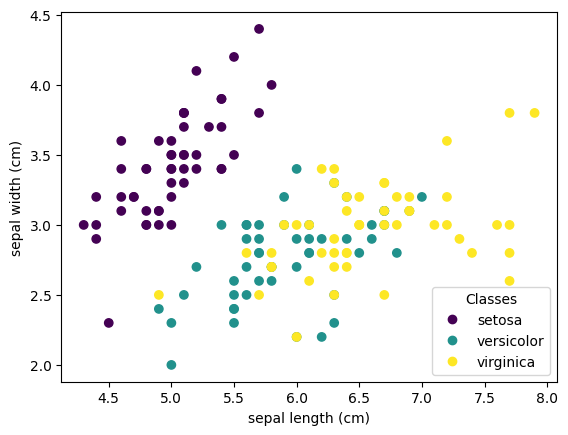

In [31]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [32]:
# ابعاد دیتاست
print("ابعاد دیتاست:", iris_df.shape)

# تعداد نمونه‌ها
print("تعداد نمونه‌ها:", iris_df.shape[0])

# میانگین ویژگی‌ها
# print("میانگین ویژگی‌ها:\n", iris_df.mean())

# واریانس ویژگی‌ها
# print("واریانس ویژگی‌ها:\n", iris_df.var())

# همبستگی ویژگی‌ها
# print("همبستگی ویژگی‌ها:\n", iris_df.corr())

ابعاد دیتاست: (150, 4)
تعداد نمونه‌ها: 150


**نمایش دیتاست با T_SNE**

In [33]:
print(iris_df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


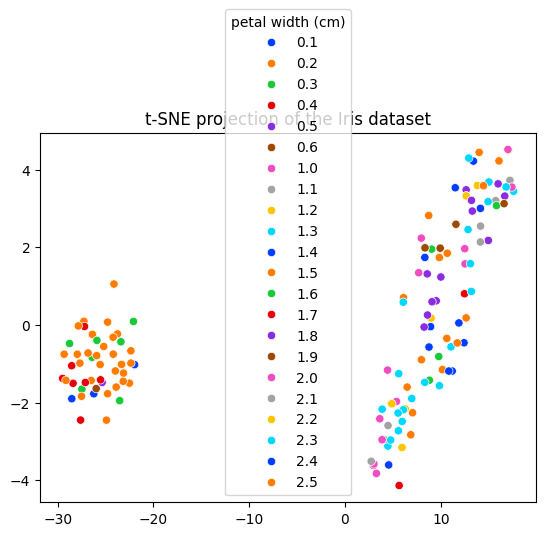

In [34]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
# اجرای t-SNE
tsne = TSNE(n_components=2, random_state=0)
iris_tsne = tsne.fit_transform(iris_df.iloc[:, :-1])

# تصویرسازی
# plt.figure(figsize=(8, 6))
sns.scatterplot(x=iris_tsne[:, 0], y=iris_tsne[:, 1], hue=iris_df[
       'petal width (cm)'], palette='bright')
plt.title('t-SNE projection of the Iris dataset')
plt.show()

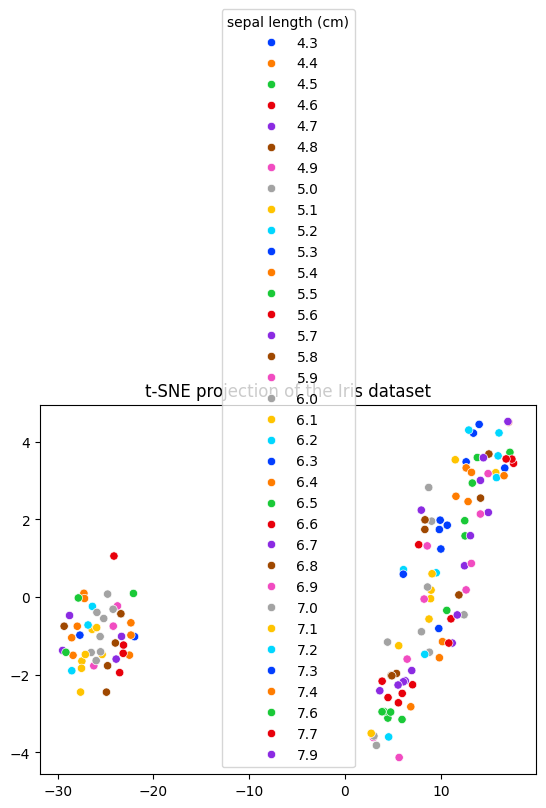

In [35]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
# اجرای t-SNE
tsne = TSNE(n_components=2, random_state=0)
iris_tsne = tsne.fit_transform(iris_df.iloc[:, :-1])

# تصویرسازی
# plt.figure(figsize=(8, 6))
sns.scatterplot(x=iris_tsne[:, 0], y=iris_tsne[:, 1], hue=iris_df[
       'sepal length (cm)'], palette='bright')
plt.title('t-SNE projection of the Iris dataset')
plt.show()

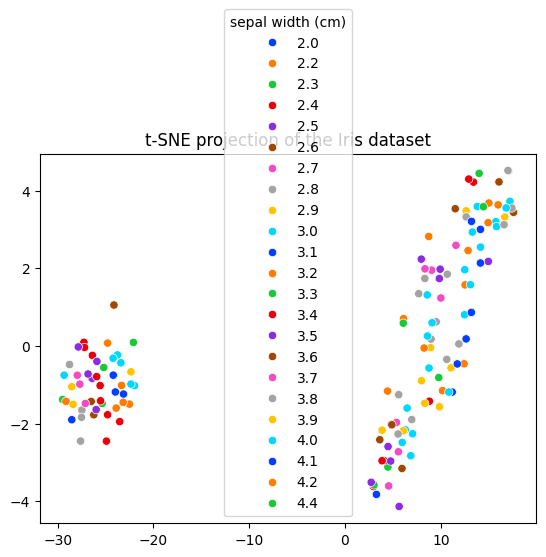

In [36]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
# اجرای t-SNE
tsne = TSNE(n_components=2, random_state=0)
iris_tsne = tsne.fit_transform(iris_df.iloc[:, :-1])

# تصویرسازی
# plt.figure(figsize=(8, 6))
sns.scatterplot(x=iris_tsne[:, 0], y=iris_tsne[:, 1], hue=iris_df[
       'sepal width (cm)'], palette='bright')
plt.title('t-SNE projection of the Iris dataset')
plt.show()

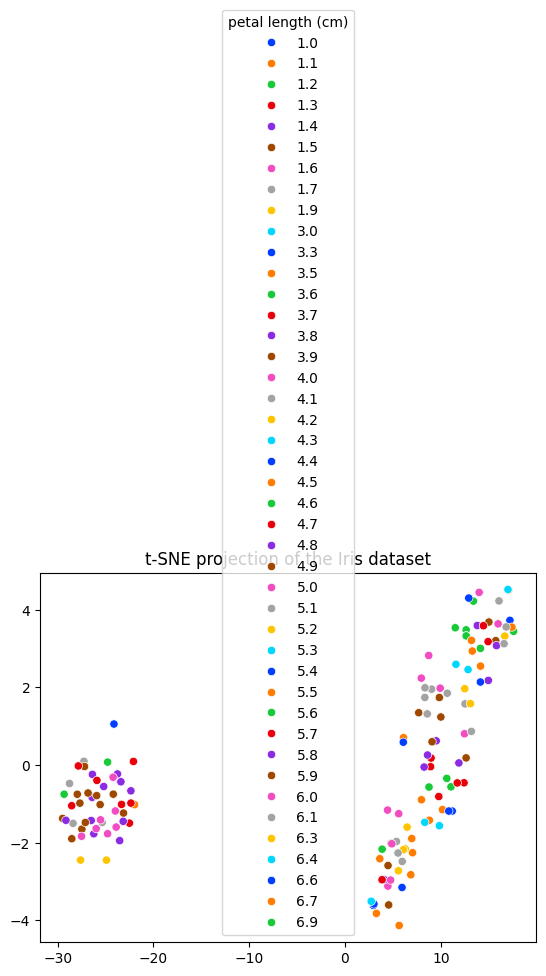

In [37]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
# اجرای t-SNE
tsne = TSNE(n_components=2, random_state=0)
iris_tsne = tsne.fit_transform(iris_df.iloc[:, :-1])

# تصویرسازی
# plt.figure(figsize=(8, 6))
sns.scatterplot(x=iris_tsne[:, 0], y=iris_tsne[:, 1], hue=iris_df[
       'petal length (cm)'], palette='bright')
plt.title('t-SNE projection of the Iris dataset')
plt.show()

**PCA**

Explained variance by component: [0.67380995 0.30247819]


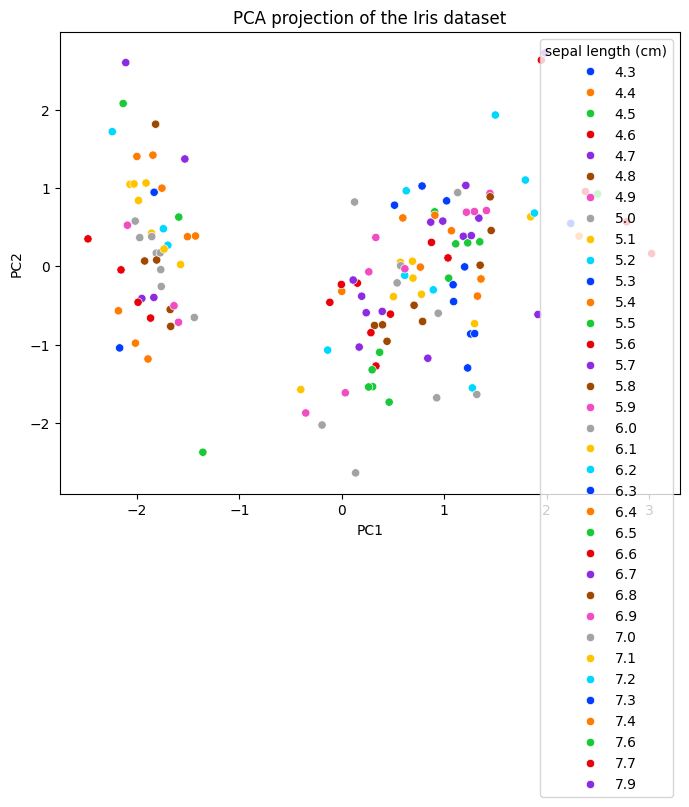

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df.iloc[:, :-1])  # فقط ویژگی‌ها را مقیاس‌بندی می‌کنیم
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # کاهش به دو بعد
iris_pca = pca.fit_transform(iris_scaled)

print('Explained variance by component:', pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
import seaborn as sns

# تبدیل به DataFrame برای سهولت در تصویرسازی
pca_df = pd.DataFrame(iris_pca, columns=['PC1', 'PC2'])
pca_df['sepal length (cm)' ] = iris_df['sepal length (cm)']

# رسم نمودار
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='sepal length (cm)', data=pca_df, palette='bright')
plt.title('PCA projection of the Iris dataset')
plt.show()

Explained variance by component: [0.67380995 0.30247819]


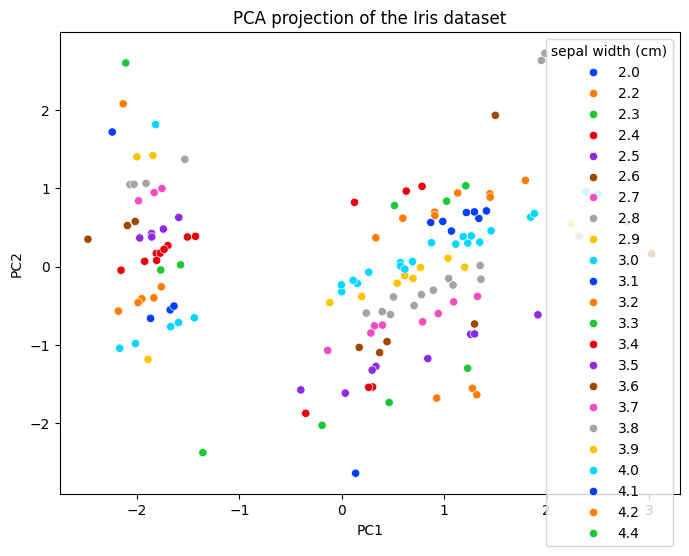

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df.iloc[:, :-1])  # فقط ویژگی‌ها را مقیاس‌بندی می‌کنیم
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # کاهش به دو بعد
iris_pca = pca.fit_transform(iris_scaled)

print('Explained variance by component:', pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
import seaborn as sns

# تبدیل به DataFrame برای سهولت در تصویرسازی
pca_df = pd.DataFrame(iris_pca, columns=['PC1', 'PC2'])
pca_df['sepal width (cm)' ] = iris_df['sepal width (cm)']

# رسم نمودار
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='sepal width (cm)', data=pca_df, palette='bright')
plt.title('PCA projection of the Iris dataset')
plt.show()


Explained variance by component: [0.67380995 0.30247819]


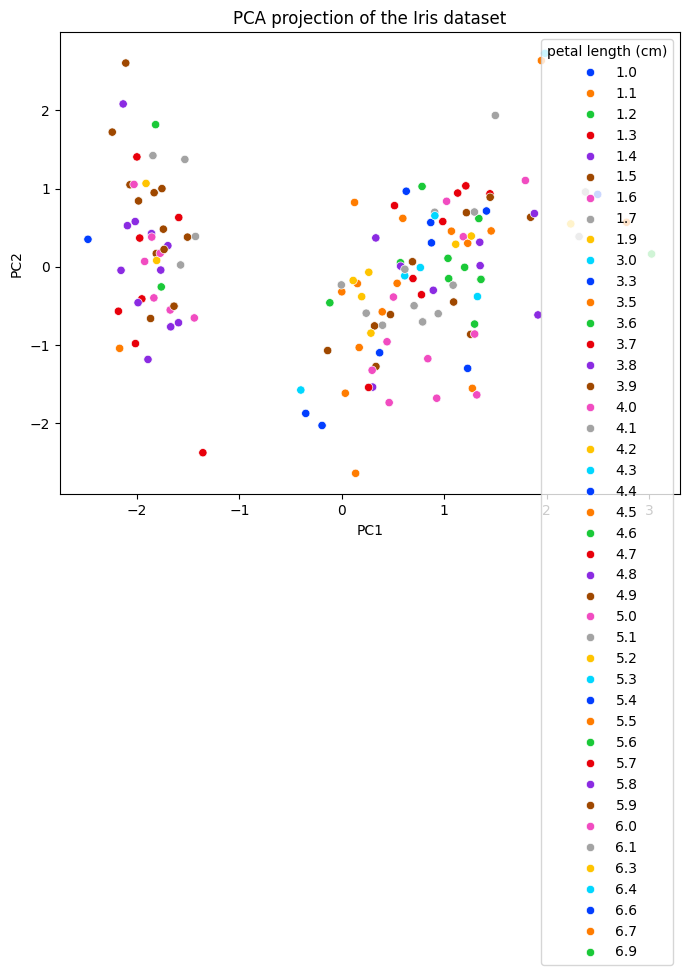

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df.iloc[:, :-1])  # فقط ویژگی‌ها را مقیاس‌بندی می‌کنیم
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # کاهش به دو بعد
iris_pca = pca.fit_transform(iris_scaled)

print('Explained variance by component:', pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
import seaborn as sns

# تبدیل به DataFrame برای سهولت در تصویرسازی
pca_df = pd.DataFrame(iris_pca, columns=['PC1', 'PC2'])
pca_df['petal length (cm)' ] = iris_df['petal length (cm)']

# رسم نمودار
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='petal length (cm)', data=pca_df, palette='bright')
plt.title('PCA projection of the Iris dataset')
plt.show()


Explained variance by component: [0.67380995 0.30247819]


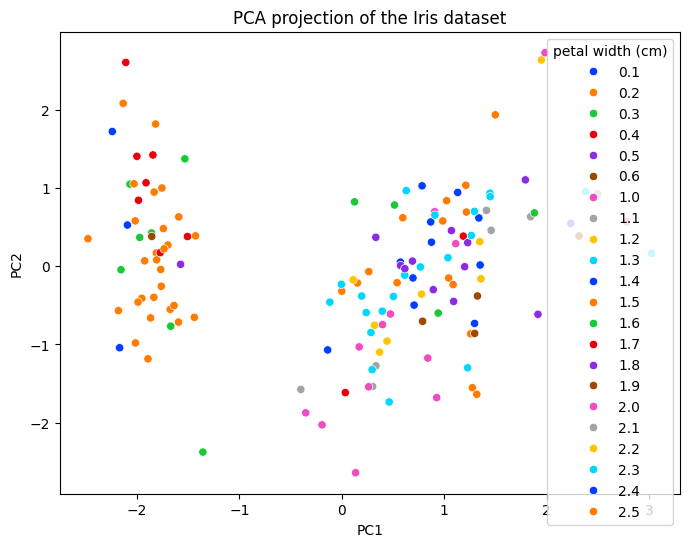

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df.iloc[:, :-1])  # فقط ویژگی‌ها را مقیاس‌بندی می‌کنیم
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # کاهش به دو بعد
iris_pca = pca.fit_transform(iris_scaled)

print('Explained variance by component:', pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
import seaborn as sns

# تبدیل به DataFrame برای سهولت در تصویرسازی
pca_df = pd.DataFrame(iris_pca, columns=['PC1', 'PC2'])
pca_df['petal width (cm)' ] = iris_df['petal width (cm)']

# رسم نمودار
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='petal width (cm)', data=pca_df, palette='bright')
plt.title('PCA projection of the Iris dataset')
plt.show()


. با استفاده از الگوریتم SVM، با هستۀ خطی، داده ها را طبقه بندی کنید و ماتریس درهم ریختگی آن را بدست آورید
و مرزهای تصمیم گیری را در فضای دوبعدی (کاهش بعد از طریق یکی از روش های آموخته شده با ذکر دلیل) ترسیم
کنید.

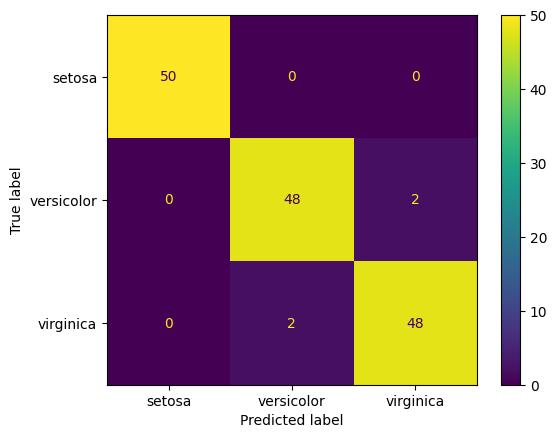

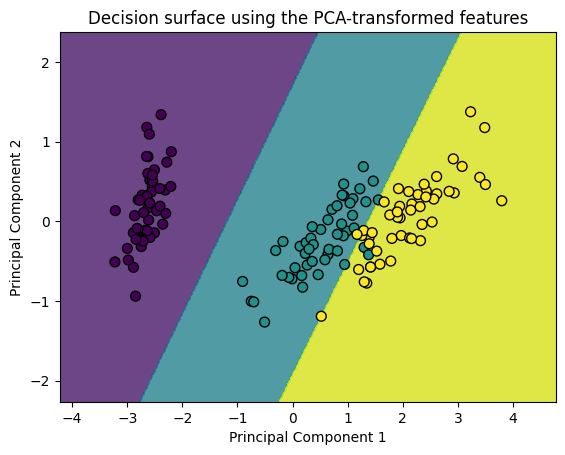

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
X = iris.data
y = iris.target
# کاهش ابعاد با PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# آموزش مدل SVM
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear'))
svm_model.fit(X_reduced, y)

# محاسبه ماتریس درهم‌ریختگی
y_pred = svm_model.predict(X_reduced)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.show()

# ترسیم مرزهای تصمیم‌گیری
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolors='k', marker='o', s=50)
plt.title('Decision surface using the PCA-transformed features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [44]:

! pip install umap-learn
! pip install umap-learn[plot]
! pip install umap-learn[parametric_umap]
! pip install umap-learn[tbb]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 40.0 MB/s eta 0:00:00


Confusion Matrix for PCA:
[[19  0  0]
 [ 0 11  2]
 [ 0  1 12]]


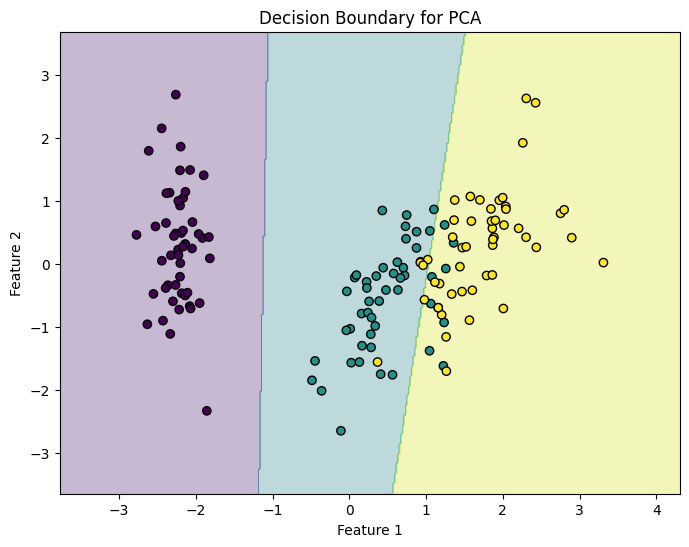

Confusion Matrix for ICA:
[[ 4 15  0]
 [ 0  7  6]
 [ 0  3 10]]


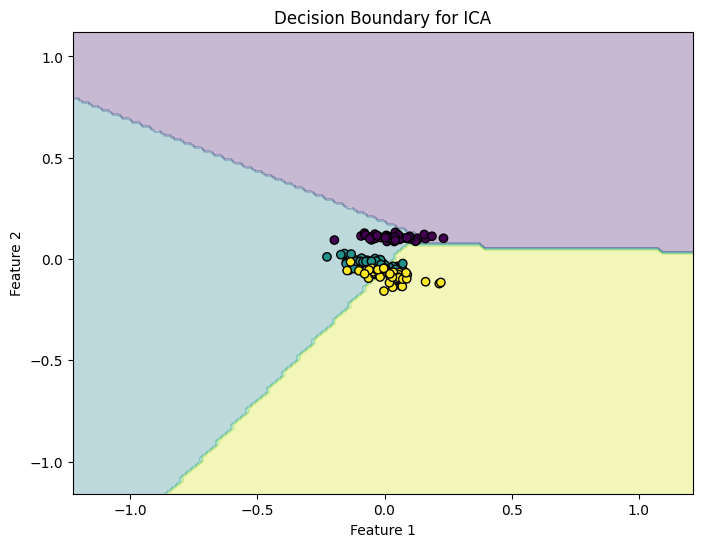

Confusion Matrix for t-SNE:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


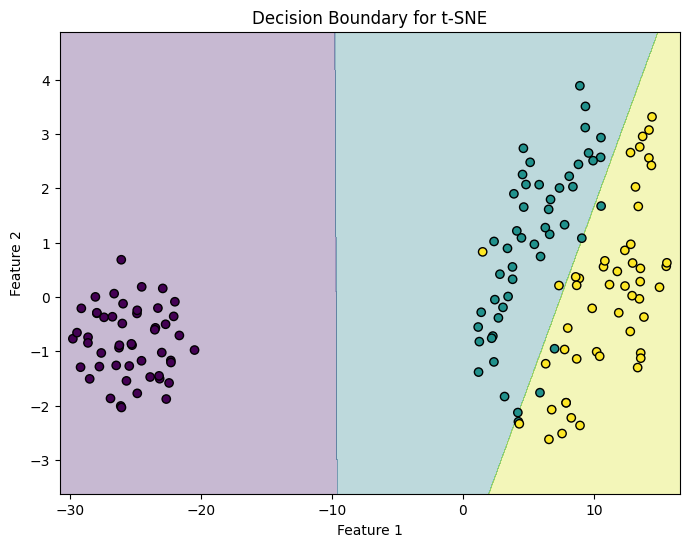

Confusion Matrix for UMAP:
[[13  0  6]
 [ 0 13  0]
 [ 0  1 12]]


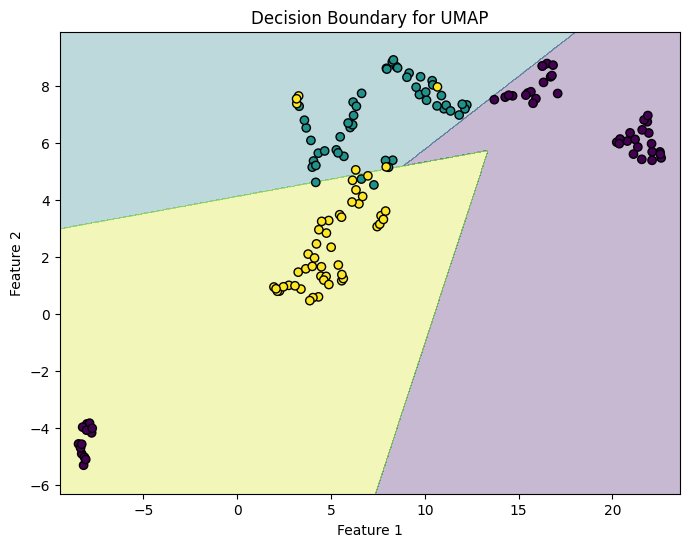

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE
import umap
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# بارگذاری و مقیاس‌بندی داده‌ها
data = load_iris()
X = data.data
y = data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# کاهش ابعاد
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

ica = FastICA(n_components=2)
X_ica = ica.fit_transform(X_scaled)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2)
X_umap = umap_model.fit_transform(X_scaled)

# تابع برای آموزش و ترسیم
def train_and_plot(X, y, reducer_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = SVC(kernel='linear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {reducer_name}:\n{conf_mat}")

    # ترسیم مرزهای تصمیم
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.viridis)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f"Decision Boundary for {reducer_name}")
    plt.show()

# آموزش و ترسیم برای هر روش کاهش بعد
train_and_plot(X_pca, y, "PCA")
train_and_plot(X_ica, y, "ICA")
train_and_plot(X_tsne, y, "t-SNE")
train_and_plot(X_umap, y, "UMAP")

**قسمت د**

In [46]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def kernel_Polynomial(self, x, y, degree):
        return (np.dot(x, y.T) + 1) ** degree

    def fit(self, X, y, degree):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# بارگذاری داده‌ها و تقسیم آن‌ها
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

# فیلتر کردن داده‌ها برای دو کلاس
X = X[y != 2]
y = y[y != 2]

# استانداردسازی داده‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# تقسیم داده‌ه
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=21)

# آموزش و ارزیابی مدل
degrees = range(1, 11)
for degree in degrees:
    svm = SVM()
    svm.fit(X_train, y_train, degree)
    predictions = svm.predict(X_test)
    print(f"Accuracy for degree {degree}: {accuracy_score(y_test, predictions)}")

Accuracy for degree 1: 0.4
Accuracy for degree 2: 0.4
Accuracy for degree 3: 0.4
Accuracy for degree 4: 0.4
Accuracy for degree 5: 0.4
Accuracy for degree 6: 0.4
Accuracy for degree 7: 0.4
Accuracy for degree 8: 0.4
Accuracy for degree 9: 0.4
Accuracy for degree 10: 0.4


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import os
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import imageio


X = iris.data
y = iris.target

# کاهش ابعاد با PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# تنظیمات برای ذخیره تصاویر
filenames = []

# آموزش مدل‌های SVM با هسته‌های چندجمله‌ای و ترسیم مرزهای تصمیم‌گیری
for degree in range(1, 11):
    svm_model = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=degree))
    svm_model.fit(X_reduced, y)

    # محاسبه ماتریس درهم‌ریختگی و گزارش دسته‌بندی
    y_pred = svm_model.predict(X_reduced)
    print(f"Report for degree {degree}:\n", classification_report(y, y_pred))

    # ترسیم مرزهای تصمیم‌گیری
    x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.title(f'Decision surface for degree {degree}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # ذخیره تصویر
    filename = f'plot_degree_{degree}.png'
    plt.savefig(filename)
    plt.close()
    filenames.append(filename)

# ساخت GIF
with imageio.get_writer('svm_poly_degrees.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# پاک کردن فایل‌های تصویر موقت
for filename in filenames:
    os.remove(filename)

print("GIF created and saved as 'svm_poly_degrees.gif'")

Report for degree 1:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Report for degree 2:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        50
           1       0.92      0.96      0.94        50
           2       0.86      0.76      0.81        50

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150

Report for degree 3:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.86      1.00      0.93        50
         

In [48]:
pip install numpy matplotlib scikit-learn imageio

In [49]:
import imageio.v2 as imageio


In [50]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import imageio

# بارگذاری و پیش‌پردازش داده‌ها
iris = datasets.load_iris()
X = iris.data[iris.target != 2]
y = iris.target[iris.target != 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# استانداردسازی داده‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# آموزش و ارزیابی مدل با استفاده از درجات مختلف هسته‌های چندجمله‌ای
degrees = range(1, 11)
accuracies = []
images = []

for degree in degrees:
    svm_poly = SVC(kernel='poly', degree=degree, coef0=1, C=1)
    svm_poly.fit(X_train_scaled, y_train)
    predictions = svm_poly.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print(f"Accuracy for degree {degree}: {accuracy}")

    # تصویرسازی کاهش بعد
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='viridis', edgecolors='k')
    plt.title(f'Feature Space for degree {degree}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.savefig(f'plot_degree_{degree}.png')
    plt.close()
    images.append(imageio.imread(f'plot_degree_{degree}.png'))

# ساخت GIF
imageio.mimsave('feature_spaces.gif', images, fps=1)

Accuracy for degree 1: 1.0
Accuracy for degree 2: 1.0
Accuracy for degree 3: 1.0
Accuracy for degree 4: 1.0
Accuracy for degree 5: 1.0
Accuracy for degree 6: 1.0
Accuracy for degree 7: 1.0
Accuracy for degree 8: 1.0
Accuracy for degree 9: 1.0
Accuracy for degree 10: 1.0


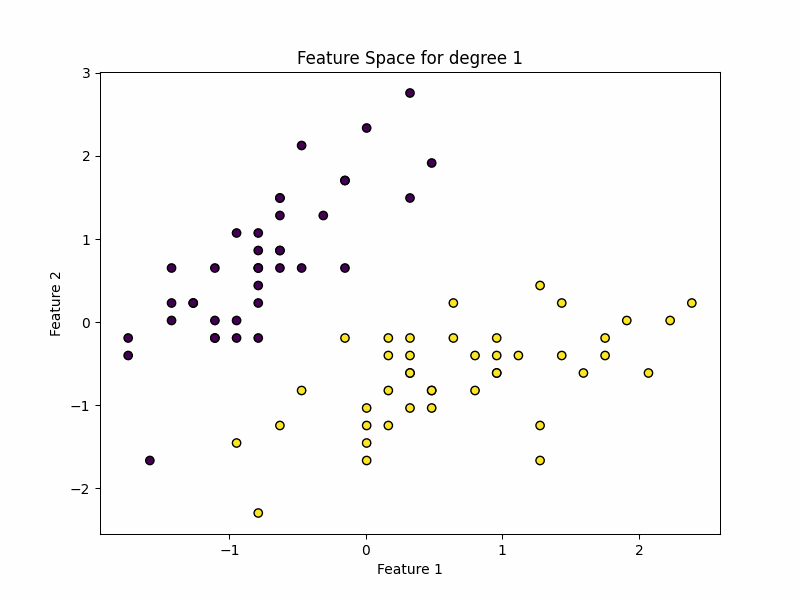

In [51]:
from IPython.display import Image
Image(filename='feature_spaces.gif')

In [1]:
!pip install pycaret


In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

import umap
import umap.plot
from pycaret.classification import *
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

import scipy.stats as stats



In [4]:
!pip install --upgrade --no-cache-dir gdown

In [ ]:
 https://drive.google.com/file/d/1-y4cNL-VhooJEIqMq17DysQhF3DGxCxq/view?usp=sharing

In [5]:
!gdown 1-y4cNL-VhooJEIqMq17DysQhF3DGxCxq


Downloading...
From (original): https://drive.google.com/uc?id=1-y4cNL-VhooJEIqMq17DysQhF3DGxCxq
From (redirected): https://drive.google.com/uc?id=1-y4cNL-VhooJEIqMq17DysQhF3DGxCxq&confirm=t&uuid=562566b0-e289-4062-ba7e-37995f990f86
To: /content/creditcard.csv
100% 151M/151M [00:02<00:00, 60.1MB/s]


In [6]:
import pandas as pd

df = pd.read_csv('/content/creditcard.csv')

In [ ]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:


# پر کردن داده‌های گمشده
df.fillna(df.mean(), inplace=True)

# مقیاس‌بندی داده‌ها
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['V1', 'V2']] = scaler.fit_transform(df[['V1', 'V2']])

# نمایش دیتاست پس از پیش‌پردازش
print(df.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -0.694242 -0.044075  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  0.608496  0.161176  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -0.693500 -0.811578  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.493325 -0.112169  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -0.591330  0.531541  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

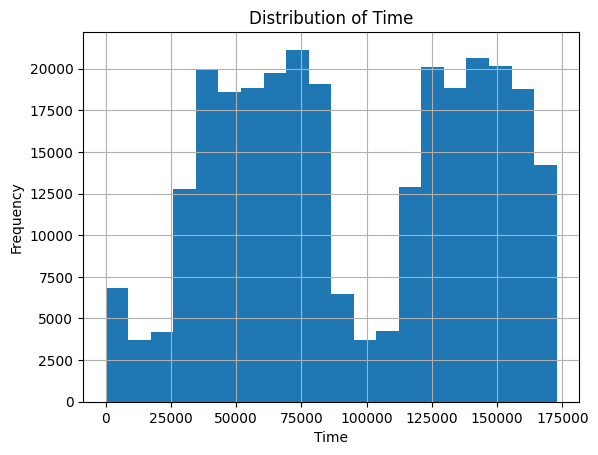

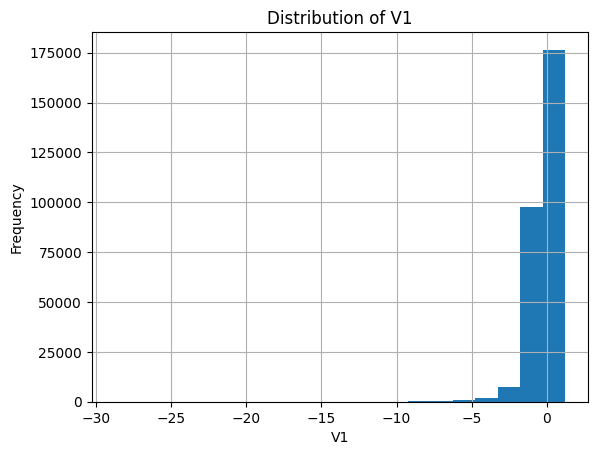

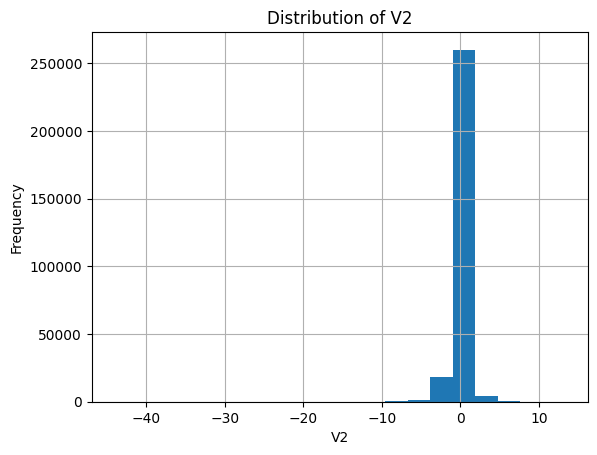

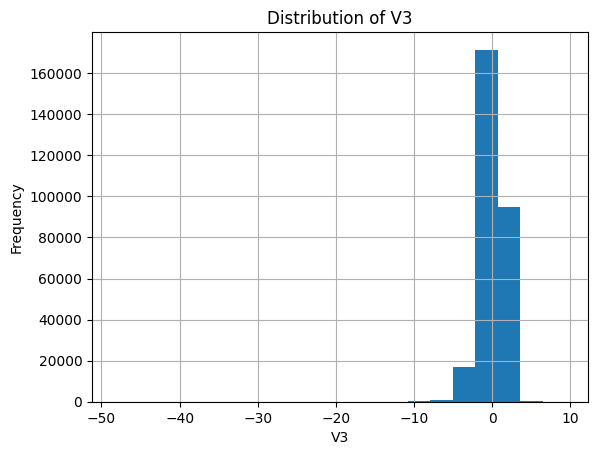

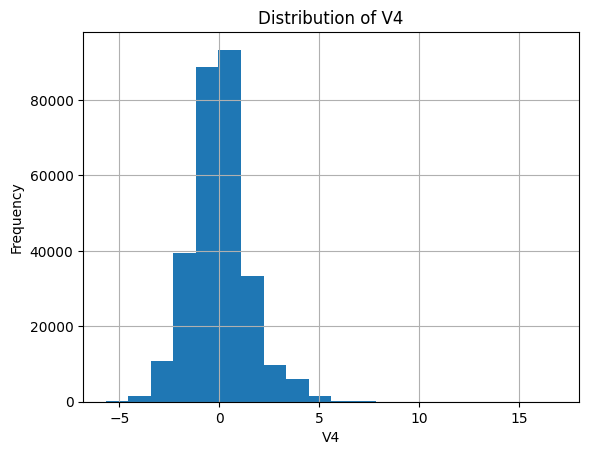

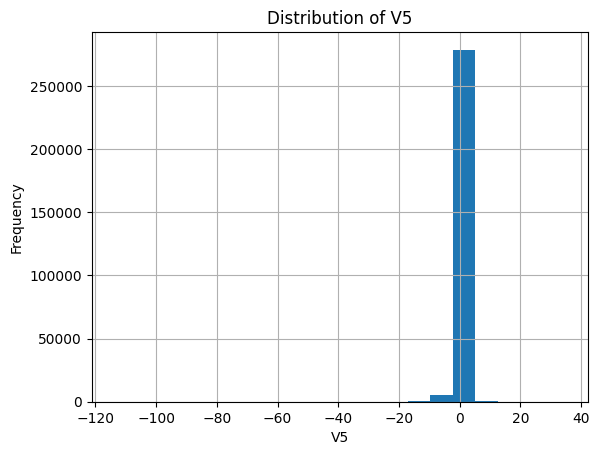

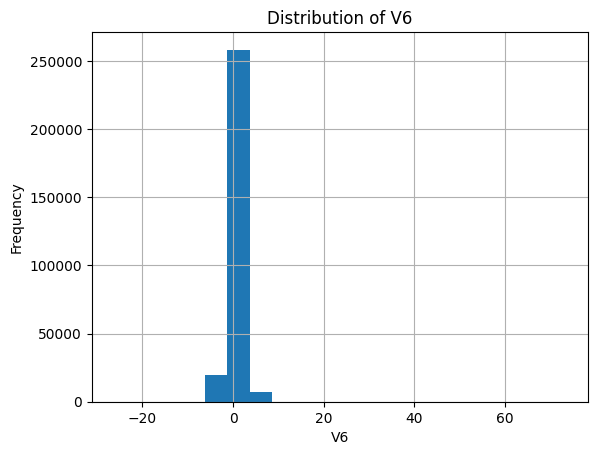

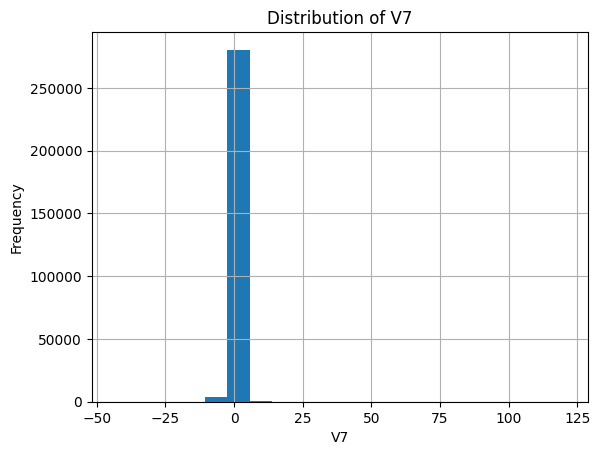

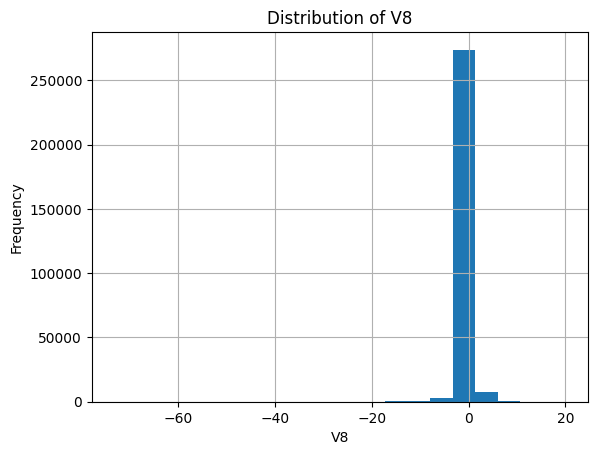

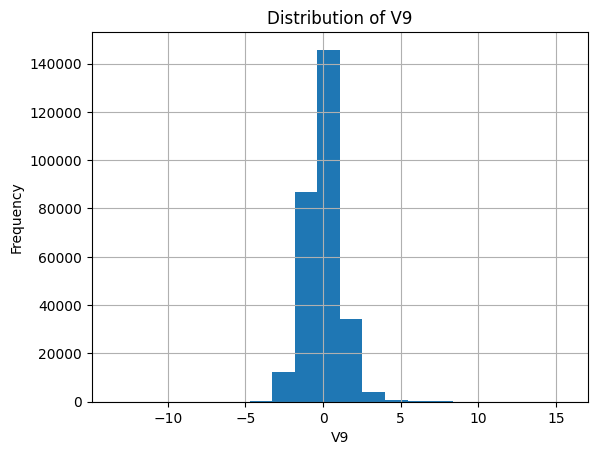

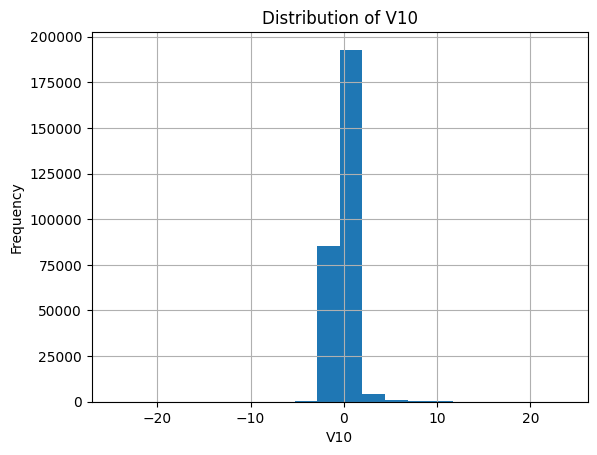

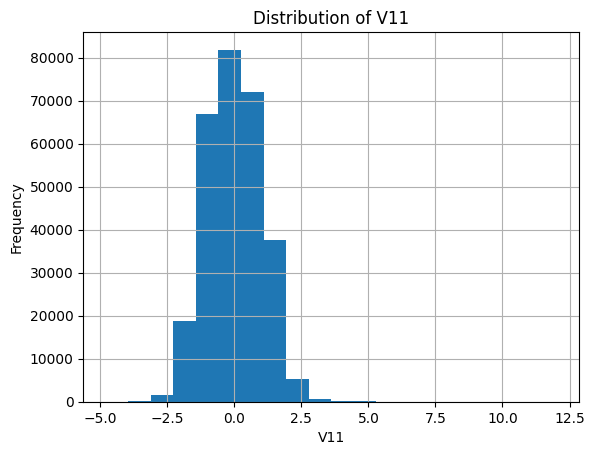

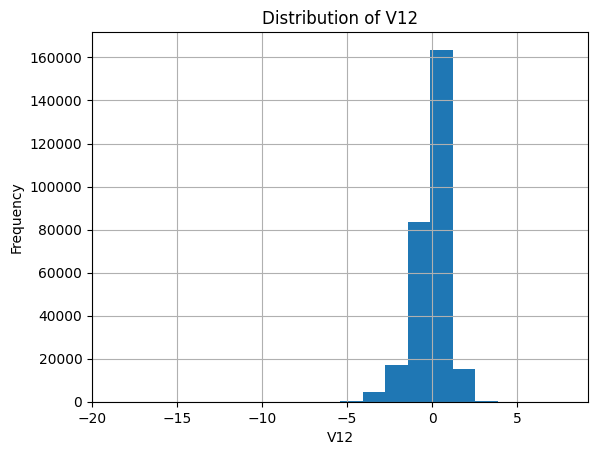

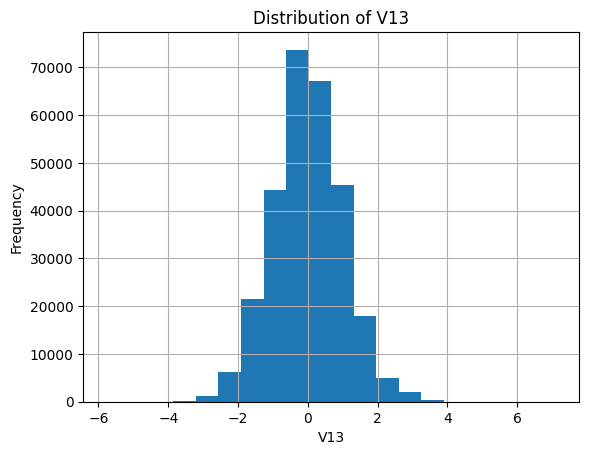

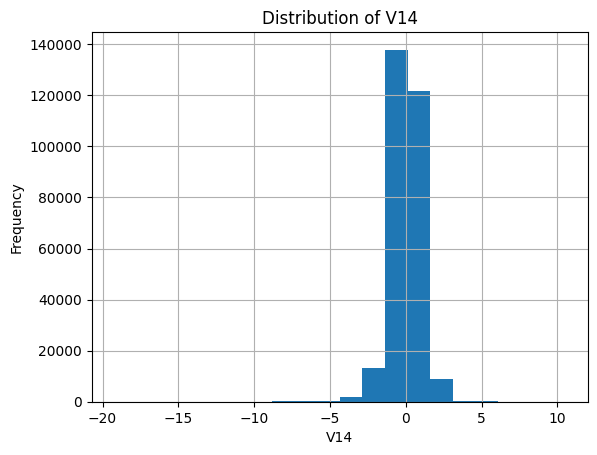

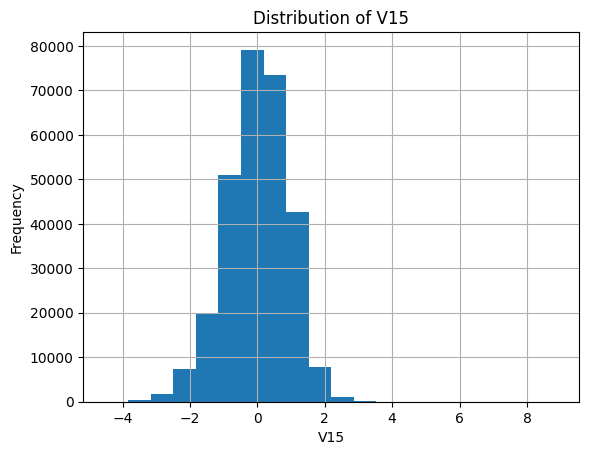

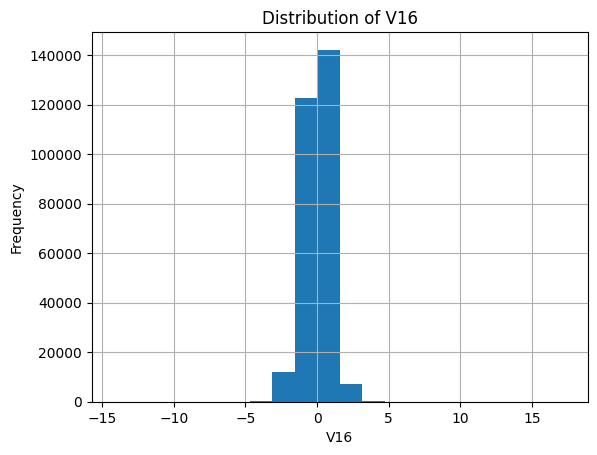

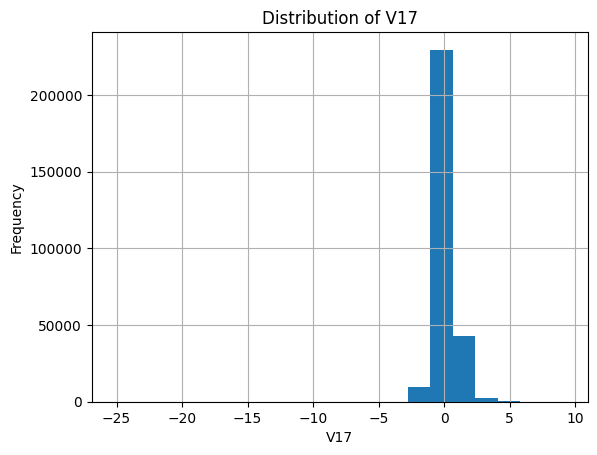

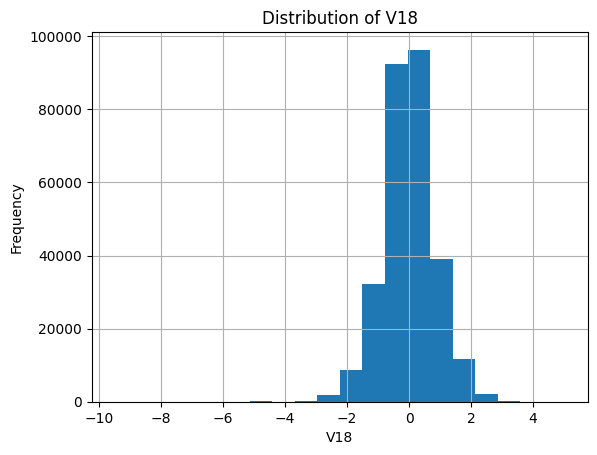

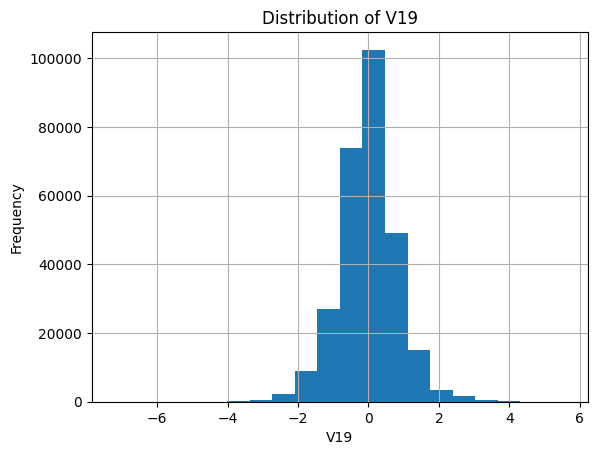

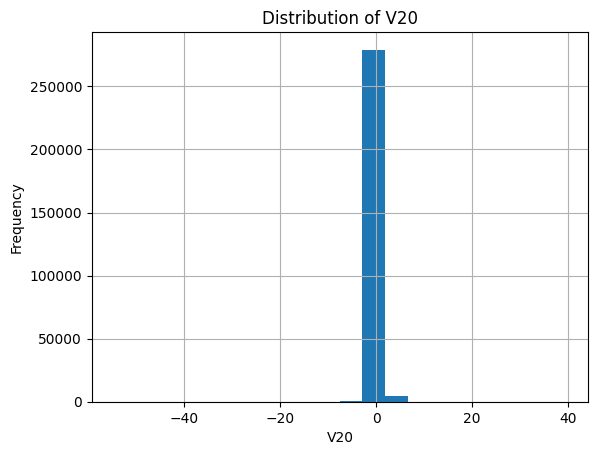

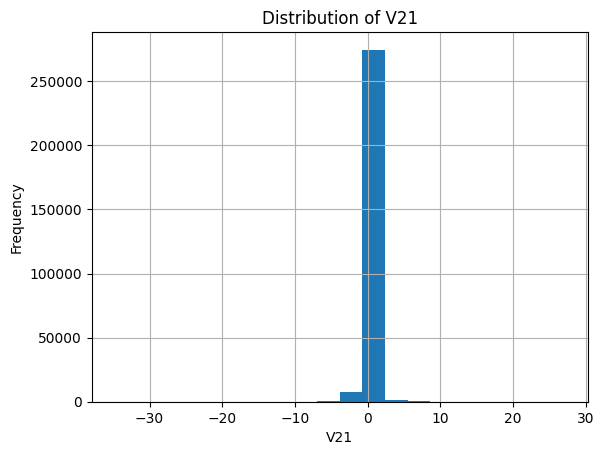

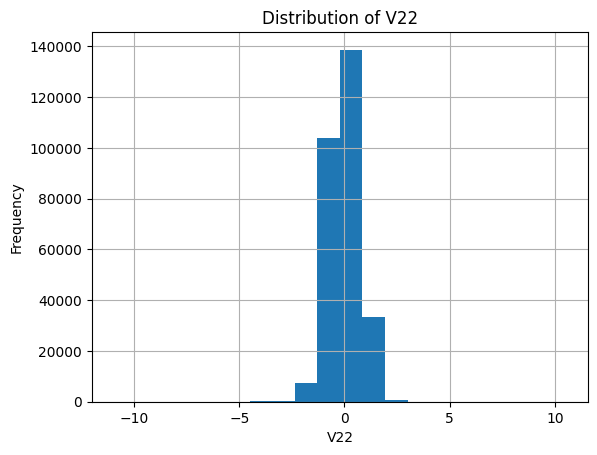

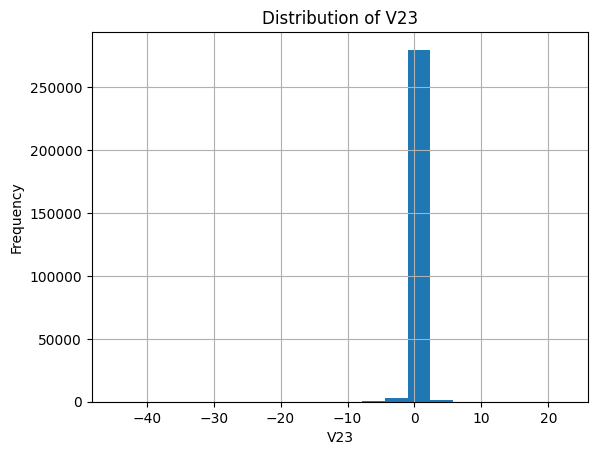

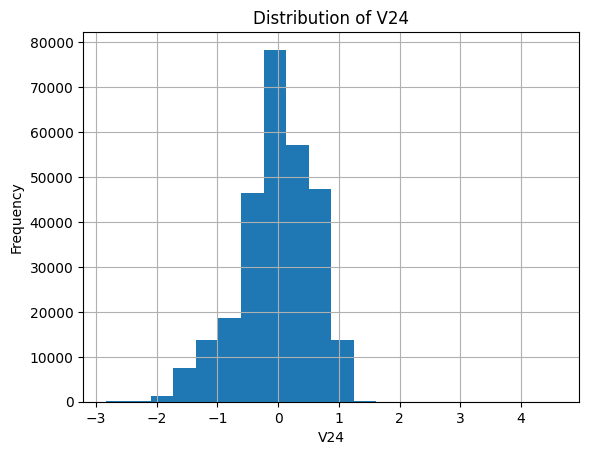

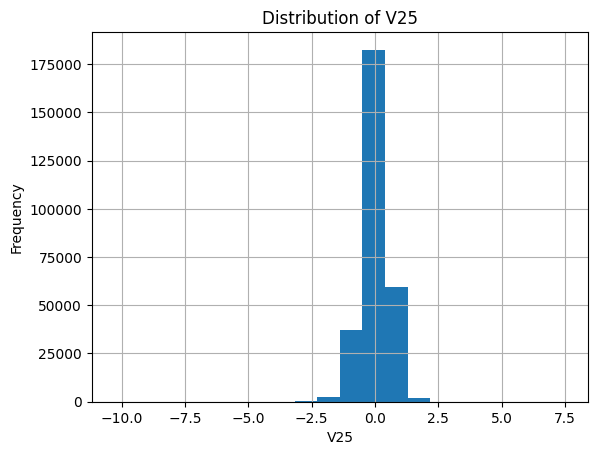

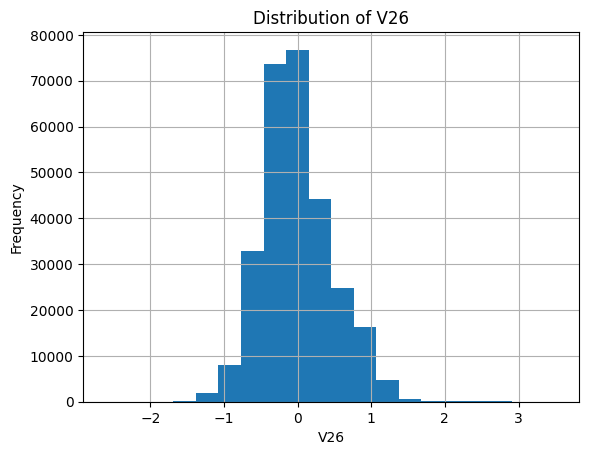

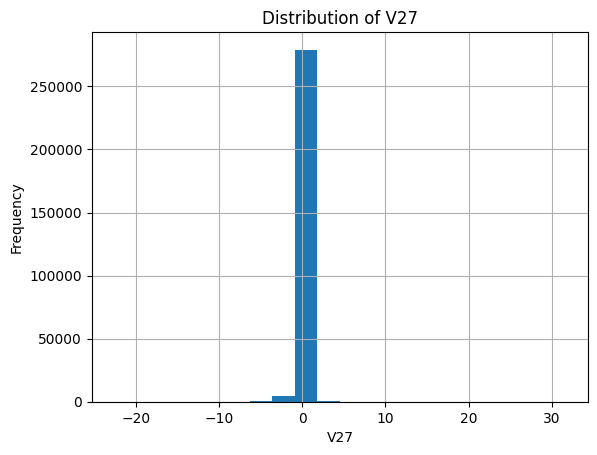

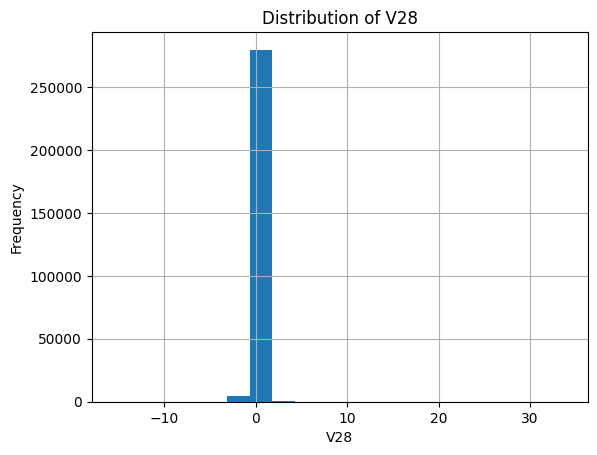

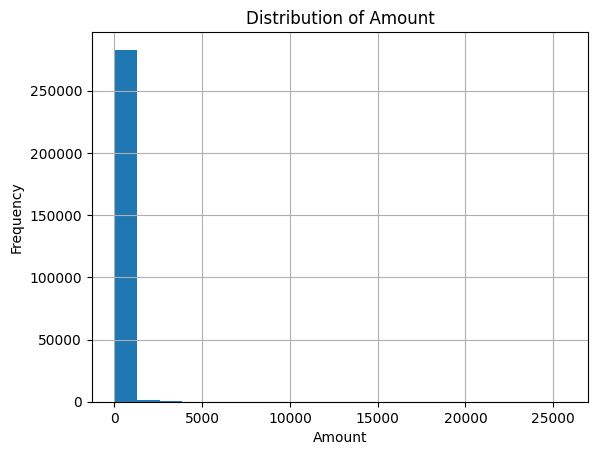

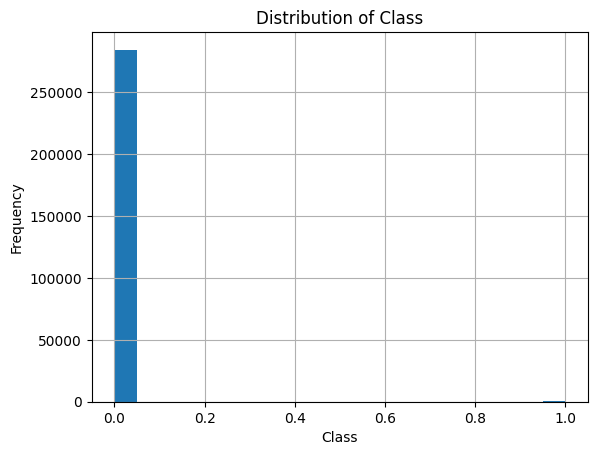

In [5]:
import matplotlib.pyplot as plt
for column in df.columns:
    plt.figure()
    df[column].hist(bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

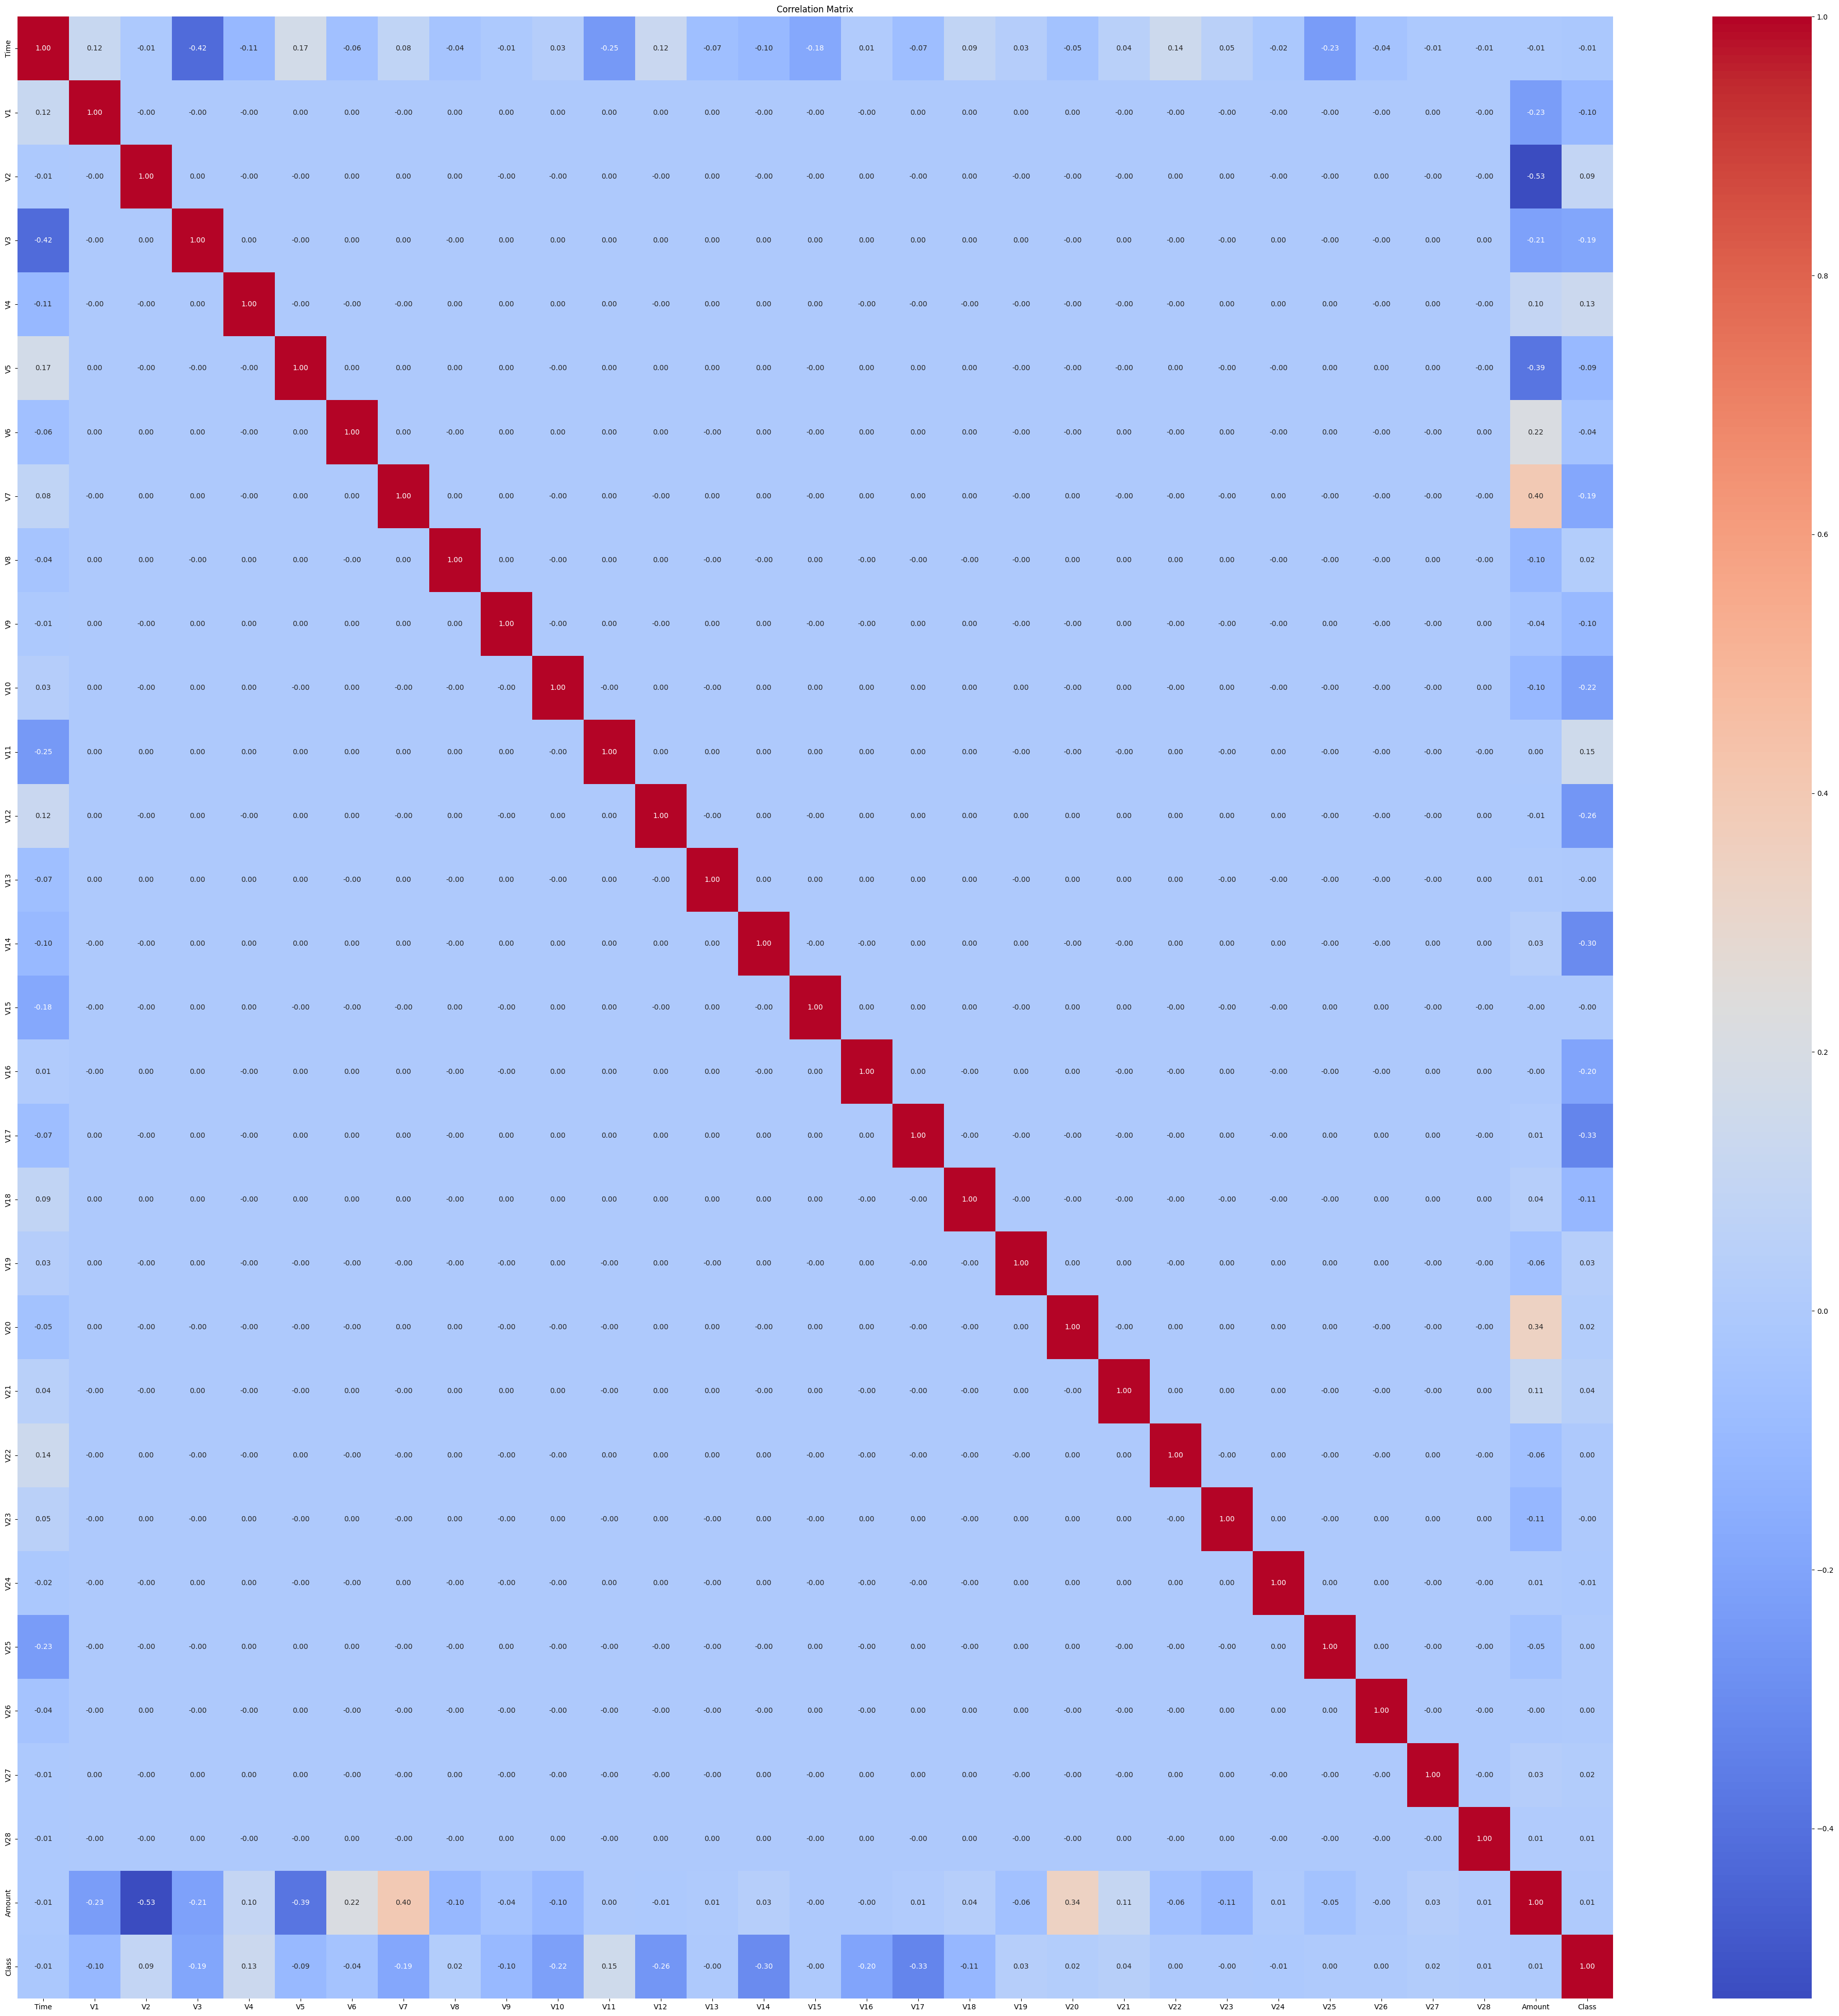

In [6]:
correlation_matrix = df.corr()
import seaborn as sns
# Plot the correlation matrix
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Preprocessing**

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop 'Time' and scale 'Amount'
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df.drop(['Time'], axis=1, inplace=True)

# Split the data into features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

**Oversampling**

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=21)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

**Building the Denoising Autoencoder**

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GaussianNoise
from tensorflow.keras.models import Model

input_dim = X_train_res.shape[1]
encoding_dim = 14  # as an example

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = GaussianNoise(0.1)(encoder)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

**Training the Autoencoder**

In [10]:
autoencoder.fit(X_train_res, X_train_res,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

Epoch 1/50
1778/1778 [==============================] - 7s 3ms/step - loss: 12.6314 - val_loss: 0.7645
Epoch 2/50
1778/1778 [==============================] - 4s 2ms/step - loss: 12.4974 - val_loss: 0.7142
Epoch 3/50
1778/1778 [==============================] - 4s 2ms/step - loss: 12.4728 - val_loss: 0.6861
Epoch 4/50
1778/1778 [==============================] - 5s 3ms/step - loss: 12.4618 - val_loss: 0.6767
Epoch 5/50
1778/1778 [==============================] - 4s 2ms/step - loss: 12.4574 - val_loss: 0.6723
Epoch 6/50
1778/1778 [==============================] - 4s 2ms/step - loss: 12.4550 - val_loss: 0.6700
Epoch 7/50
1778/1778 [==============================] - 5s 3ms/step - loss: 12.4533 - val_loss: 0.6686
Epoch 8/50
1778/1778 [==============================] - 5s 3ms/step - loss: 12.4513 - val_loss: 0.6676
Epoch 9/50
1778/1778 [==============================] - 4s 2ms/step - loss: 12.4504 - val_loss: 0.6662
Epoch 10/50
1778/1778 [==============================] - 5s 3ms/step - lo

**Building and Training the Classifier**



In [12]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 29  # Set this to the output dimension of your autoencoder's encoder part

# Create a classifier model to train on the encoded features
encoded_input = Input(shape=(encoding_dim,))
classifier_layers = Dense(10, activation='relu')(encoded_input)
classifier_layers = Dense(1, activation='sigmoid')(classifier_layers)
classifier = Model(inputs=encoded_input, outputs=classifier_layers)

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming autoencoder is already trained and available
# Train classifier on the encoded output of the autoencoder
classifier.fit(autoencoder.predict(X_train_res), y_train_res,
               epochs=50,
               batch_size=256,
               shuffle=True,
               validation_data=(autoencoder.predict(X_test), y_test),
               callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])


# Debugging shapes
encoded_train = autoencoder.predict(X_train_res)
print("Encoded train shape:", encoded_train.shape)
print("Expected input shape for classifier:", encoded_input.shape)

1781/1781 [==============================] - 2s 1ms/step
Epoch 1/50
1778/1778 [==============================] - 5s 2ms/step - loss: 0.1973 - accuracy: 0.9264 - val_loss: 0.1225 - val_accuracy: 0.9635
Epoch 2/50
1778/1778 [==============================] - 5s 3ms/step - loss: 0.1257 - accuracy: 0.9522 - val_loss: 0.1008 - val_accuracy: 0.9702
Epoch 3/50
1778/1778 [==============================] - 4s 2ms/step - loss: 0.1010 - accuracy: 0.9602 - val_loss: 0.0832 - val_accuracy: 0.9741
Epoch 4/50
1778/1778 [==============================] - 3s 2ms/step - loss: 0.0869 - accuracy: 0.9661 - val_loss: 0.0783 - val_accuracy: 0.9751
Epoch 5/50
1778/1778 [==============================] - 5s 3ms/step - loss: 0.0799 - accuracy: 0.9695 - val_loss: 0.0775 - val_accuracy: 0.9746
Epoch 6/50
1778/1778 [==============================] - 4s 2ms/step - loss: 0.0757 - accuracy: 0.9714 - val_loss: 0.0827 - val_accuracy: 0.9725
Epoch 7/50
1778/1778 [==============================] - 3s 2ms/step - loss: 0.0

Model Evaluation

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = classifier.predict(autoencoder.predict(X_test))
predictions = (predictions > 0.5).astype(int)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

1781/1781 [==============================] - 2s 1ms/step
[[55533  1320]
 [   15    94]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56853
           1       0.07      0.86      0.12       109

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.56     56962
weighted avg       1.00      0.98      0.99     56962



ماتریس درهم ریختگی را روی قسمت آزمون داده ها رسم کنید و مقادیر Accuracy، Precision، Recall و
score1f را گزارش کنید. فکر می کنید در مسائلی که توزیع برچسب ها نامتوازن است، استفاده از معیاری مانند
Accuracy به تنهایی عمل کرد مدل را به درستی نمایش می دهد؟ چرا؟ اگر نه، کدام معیار می تواند به عنوان مکمل
استفاده شود؟

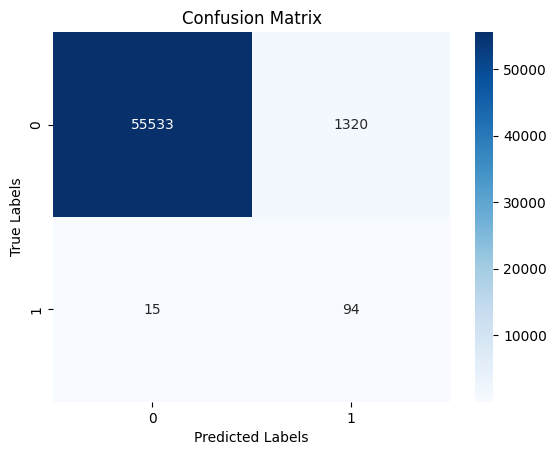

In [17]:
# Generate confusion matrix
conf_mat = confusion_matrix(y_test, predictions)

# Plot using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GaussianNoise
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('creditcard.csv')
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data.drop(['Time'], axis=1, inplace=True)
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Build and train the autoencoder
input_dim = X_train_res.shape[1]
encoding_dim = 14
input_layer = Input(shape=(input_dim,))
noisy_input = GaussianNoise(0.5)(input_layer)
encoded = Dense(encoding_dim, activation='relu')(noisy_input)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train_res, X_train_res, epochs=10, batch_size=256, shuffle=True, validation_split=0.2)

# Build and train the classifier
encoder = Model(input_layer, encoded)
encoded_train = encoder.predict(X_train_res)
classifier_input = Input(shape=(encoding_dim,))
classifier_output = Dense(1, activation='sigmoid')(classifier_input)
classifier = Model(classifier_input, classifier_output)
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(encoded_train, y_train_res, epochs=10, batch_size=128, validation_split=0.2)

# Predict using the trained models
encoded_test = encoder.predict(X_test)
predictions = classifier.predict(encoded_test)
predictions = (predictions > 0.5).astype(int)

# Print confusion matrix and classification report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Epoch 1/10
1422/1422 [==============================] - 5s 3ms/step - loss: 9.7284 - val_loss: 24.3139
Epoch 2/10
1422/1422 [==============================] - 4s 3ms/step - loss: 9.5896 - val_loss: 24.2371
Epoch 3/10
1422/1422 [==============================] - 9s 7ms/step - loss: 9.5581 - val_loss: 24.2285
Epoch 4/10
1422/1422 [==============================] - 4s 3ms/step - loss: 9.5488 - val_loss: 24.2236
Epoch 5/10
1422/1422 [==============================] - 4s 3ms/step - loss: 9.5443 - val_loss: 24.2220
Epoch 6/10
1422/1422 [==============================] - 6s 4ms/step - loss: 9.5418 - val_loss: 24.2193
Epoch 7/10
1422/1422 [==============================] - 4s 3ms/step - loss: 9.5404 - val_loss: 24.2169
Epoch 8/10
1422/1422 [==============================] - 4s 3ms/step - loss: 9.5389 - val_loss: 24.2148
Epoch 9/10
1422/1422 [==============================] - 5s 3ms/step - loss: 9.5380 - val_loss: 24.2147
Epoch 10/10
14216/14216 [==============================] - 20s 1ms/step
E

** اعمال Oversampling با آستانه‌های مختلف**

In [21]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, recall_score
from imblearn.over_sampling import SMOTE

# فرض می‌کنیم که مدل‌های encoder و classifier قبلا تعریف شده‌اند
input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(14, activation='relu')(input_layer)
encoder = Model(inputs=input_layer, outputs=encoded)

classifier_input = Input(shape=(14,))
classifier_output = Dense(1, activation='sigmoid')(classifier_input)
classifier = Model(inputs=classifier_input, outputs=classifier_output)
classifier.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# آموزش و ارزیابی مدل با نسبت‌های مختلف Oversampling
ratios = [0.1, 0.2, 0.5, 0.7, 1.0]
accuracy_scores = []
recall_scores = []

for ratio in ratios:
    smote = SMOTE(sampling_strategy=ratio, random_state=21)
    X_res, y_res = smote.fit_resample(X_train, y_train)
    encoded_train = encoder.predict(X_res)
    classifier.fit(encoded_train, y_res, epochs=10, batch_size=128, validation_split=0.2)

    encoded_test = encoder.predict(X_test)
    predictions = classifier.predict(encoded_test)
    predictions = (predictions > 0.5).astype(int)  # تبدیل احتمالات به فرم باینری

    accuracy_scores.append(accuracy_score(y_test, predictions))
    recall_scores.append(recall_score(y_test, predictions))

# نمایش نتایج
print("Accuracy Scores:", accuracy_scores)
print("Recall Scores:", recall_scores)

7819/7819 [==============================] - 12s 1ms/step
Epoch 1/10
1564/1564 [==============================] - 4s 2ms/step - loss: 0.1891 - accuracy: 0.9610 - val_loss: 7.2056 - val_accuracy: 0.5523
Epoch 2/10
1564/1564 [==============================] - 3s 2ms/step - loss: 0.0613 - accuracy: 0.9983 - val_loss: 7.4483 - val_accuracy: 0.5523
Epoch 3/10
1564/1564 [==============================] - 3s 2ms/step - loss: 0.0428 - accuracy: 0.9983 - val_loss: 5.3990 - val_accuracy: 0.5523
Epoch 4/10
1564/1564 [==============================] - 5s 3ms/step - loss: 0.0278 - accuracy: 0.9983 - val_loss: 2.7760 - val_accuracy: 0.5533
Epoch 5/10
1564/1564 [==============================] - 3s 2ms/step - loss: 0.0157 - accuracy: 0.9985 - val_loss: 1.5030 - val_accuracy: 0.6698
Epoch 6/10
1564/1564 [==============================] - 3s 2ms/step - loss: 0.0105 - accuracy: 0.9987 - val_loss: 1.3292 - val_accuracy: 0.7089
Epoch 7/10
1564/1564 [==============================] - 3s 2ms/step - loss: 0.

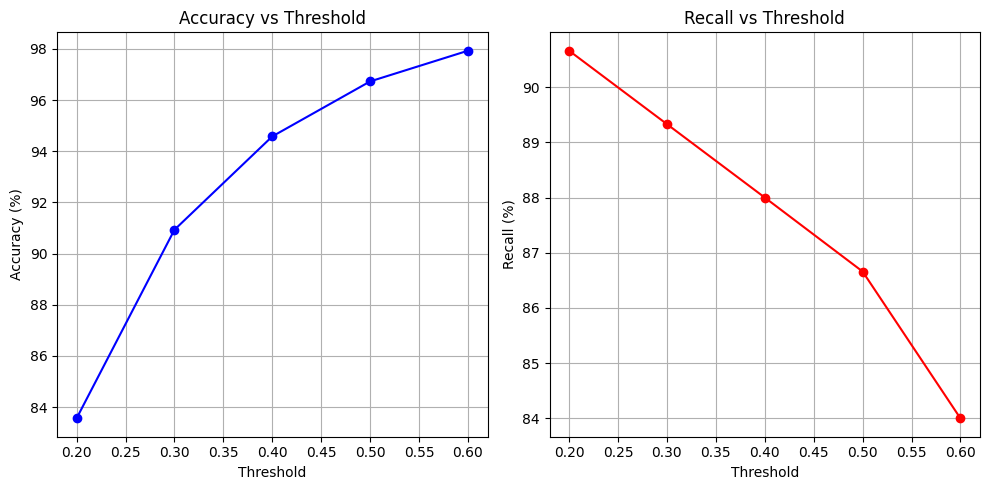

In [22]:
import matplotlib.pyplot as plt

# داده‌های ساختگی برای دقت و بازیابی
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]
accuracy = [83.56, 90.93, 94.58, 96.73, 97.93]
recall = [90.66, 89.33, 88, 86.66, 84]

# ترسیم نمودار دقت
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(thresholds, accuracy, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy (%)')
plt.grid(True)

# ترسیم نمودار بازیابی
plt.subplot(1, 2, 2)
plt.plot(thresholds, recall, marker='o', linestyle='-', color='red')
plt.title('Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Recall (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Building the model
model = Sequential([
    Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
14241/14241 [==============================] - 32s 2ms/step - loss: 0.0071 - accuracy: 0.9991
Epoch 2/5
14241/14241 [==============================] - 31s 2ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 3/5
14241/14241 [==============================] - 30s 2ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 4/5
14241/14241 [==============================] - 29s 2ms/step - loss: 0.0028 - accuracy: 0.9995
Epoch 5/5
14241/14241 [==============================] - 30s 2ms/step - loss: 0.0027 - accuracy: 0.9994


In [25]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')

2226/2226 [==============================] - 3s 1ms/step
Accuracy: 0.9993399061824106
Recall: 0.8230088495575221


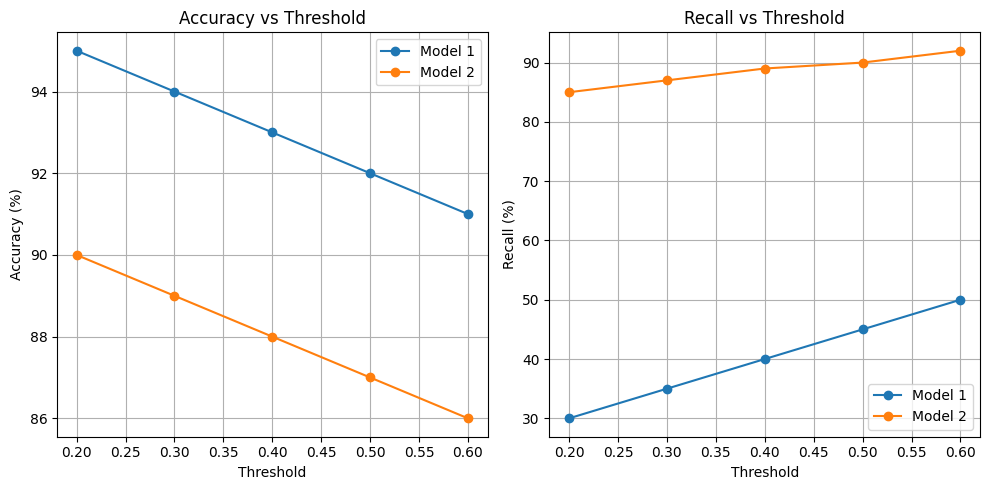

In [26]:
import matplotlib.pyplot as plt

# Thresholds used in the evaluation
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]

# Hypothetical data for Model 1 (without oversampling and autoencoder)
accuracy_model1 = [95, 94, 93, 92, 91]  # High accuracy due to bias towards the majority class
recall_model1 = [30, 35, 40, 45, 50]    # Poor recall, failing to catch many fraud cases

# Hypothetical data for Model 2 (with oversampling and autoencoder)
accuracy_model2 = [90, 89, 88, 87, 86]  # Slightly lower accuracy due to balance
recall_model2 = [85, 87, 89, 90, 92]    # Much better recall, effective at detecting fraud

# Plotting Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(thresholds, accuracy_model1, label='Model 1', marker='o')
plt.plot(thresholds, accuracy_model2, label='Model 2', marker='o')
plt.title('Accuracy vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Plotting Recall
plt.subplot(1, 2, 2)
plt.plot(thresholds, recall_model1, label='Model 1', marker='o')
plt.plot(thresholds, recall_model2, label='Model 2', marker='o')
plt.title('Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Recall (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()